In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import env

import warnings
warnings.filterwarnings("ignore")

Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

Choose features other than the ones used in the lesson.
Visualize the results of your clustering.
Use the elbow method to visually select a good value for k.
Repeat the clustering, this time with 3 different features.


In [2]:
sql_url = env.get_connection('iris_db')

In [3]:
query = '''SELECT sepal_length, sepal_width, petal_length, petal_width, species_id, species_name
           FROM measurements
           JOIN species USING(species_id);
        '''


In [4]:
df = pd.read_sql(query, sql_url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_id,species_name
0,5.1,3.5,1.4,0.2,1,setosa
1,4.9,3.0,1.4,0.2,1,setosa
2,4.7,3.2,1.3,0.2,1,setosa
3,4.6,3.1,1.5,0.2,1,setosa
4,5.0,3.6,1.4,0.2,1,setosa


In [5]:
seed = 42

train, val_test = train_test_split(df, train_size=0.7, random_state=seed )

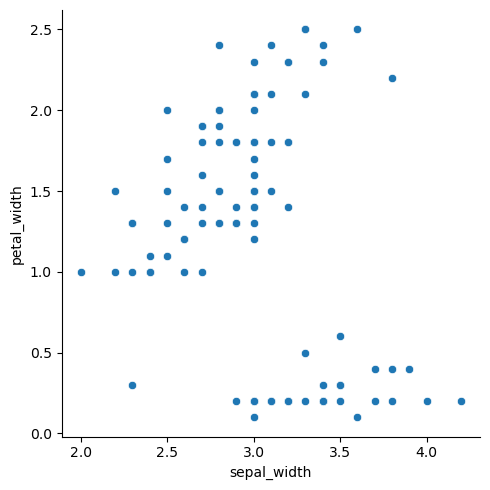

In [6]:
sns.relplot(data=train, x ='sepal_width', y='petal_width')

In [7]:
X = train[['sepal_width', 'petal_width']]

In [8]:
seed=42

kmeans = KMeans(n_clusters=3, random_state=seed)

kmeans.fit(X)

kmeans.predict(X)

array([1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1,
       2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 0,
       2, 1, 2, 1, 1, 2, 1, 0, 0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1,
       2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0,
       2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 1, 0, 1, 2], dtype=int32)

In [9]:
# create new feature to desccribe the data
X['unscaled_clusters'] = kmeans.predict(X)
X.head()

,sepal_width,petal_width,unscaled_clusters
81,2.4,1.0,1
133,2.8,1.5,1
137,3.1,1.8,2
75,3.0,1.4,1
109,3.6,2.5,2


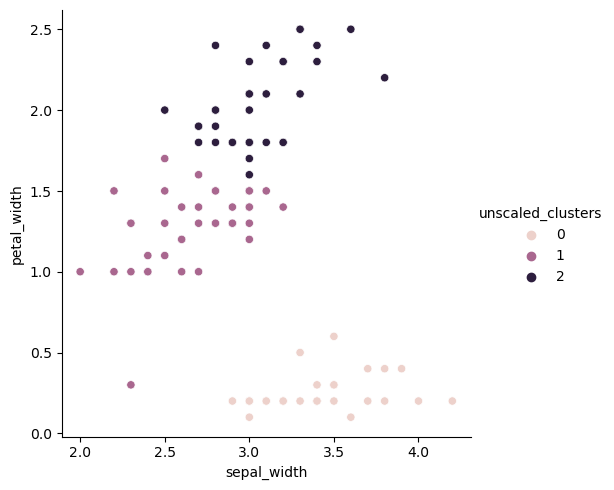

In [10]:
sns.relplot(data=X, x ='sepal_width', y='petal_width', hue='unscaled_clusters')
plt.show()

In [11]:
mm_scaler = MinMaxScaler()

X[['sepal_width', 'petal_width']] = mm_scaler.fit_transform(X[['sepal_width', 'petal_width']])

X.head()

,sepal_width,petal_width,unscaled_clusters
81,0.181818,0.375000,1
133,0.363636,0.583333,1
137,0.500000,0.708333,2
75,0.454545,0.541667,1
109,0.727273,1.000000,2


In [12]:
kmeans_scale = KMeans(n_clusters=3, random_state=seed)

kmeans_scale.fit(X[['sepal_width', 'petal_width']])

KMeans(n_clusters=3, random_state=42)

In [13]:
kmeans_scale.predict(X[['sepal_width', 'petal_width']])

array([0, 0, 2, 0, 2, 0, 2, 0, 1, 2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 0,
       2, 1, 0, 2, 1, 2, 2, 0, 0, 2, 0, 1, 0, 2, 1, 1, 0, 2, 1, 2, 1, 1,
       2, 0, 2, 0, 0, 2, 0, 1, 1, 0, 2, 1, 1, 1, 0, 2, 1, 2, 2, 1, 0, 0,
       2, 0, 2, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 1, 0, 2, 2, 1,
       2, 1, 0, 2, 2, 0, 2, 0, 0, 2, 2, 1, 0, 0, 1, 0, 2], dtype=int32)

In [14]:
X['scaled_clusters'] = kmeans_scale.predict(X[['sepal_width', 'petal_width']])

X.head()

,sepal_width,petal_width,unscaled_clusters,scaled_clusters
81,0.181818,0.375000,1,0
133,0.363636,0.583333,1,0
137,0.500000,0.708333,2,2
75,0.454545,0.541667,1,0
109,0.727273,1.000000,2,2


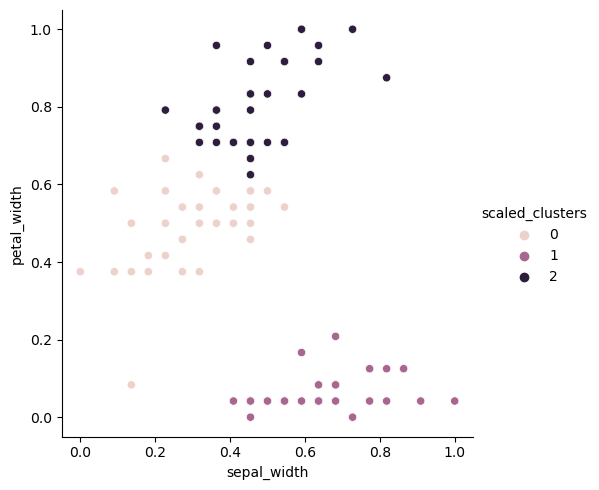

In [15]:
sns.relplot(data=X, x ='sepal_width', y='petal_width', hue='scaled_clusters')
plt.show()

In [16]:
kmeans_scale.cluster_centers_

array([[0.30681818, 0.490625  ],
       [0.64242424, 0.06111111],
       [0.47532468, 0.81071429]])

In [17]:
kmeans_scale.inertia_

2.6922686517501857

In [18]:
inertia = []
seed = 42

for n in range(1,11):
    
    kmeans = KMeans(n_clusters=n, random_state=seed)
    
    kmeans.fit(X[['sepal_width', 'petal_width']])
    
    inertia.append(kmeans.inertia_)
    
inertia

[13.730812453539727,
 5.00619562010691,
 2.6922686517501857,
 1.9329432893674374,
 1.5269447602574675,
 1.148502289008829,
 0.9792181377426691,
 0.8700839655677557,
 0.7729595689198825,
 0.6434126238695368]

In [19]:
results_df = pd.DataFrame({'n_clusters': list(range(1,11)),
              'inertia': inertia})
results_df

,n_clusters,inertia
0,1,13.730812
1,2,5.006196
2,3,2.692269
3,4,1.932943
4,5,1.526945
5,6,1.148502
6,7,0.979218
7,8,0.870084
8,9,0.772960
9,10,0.643413


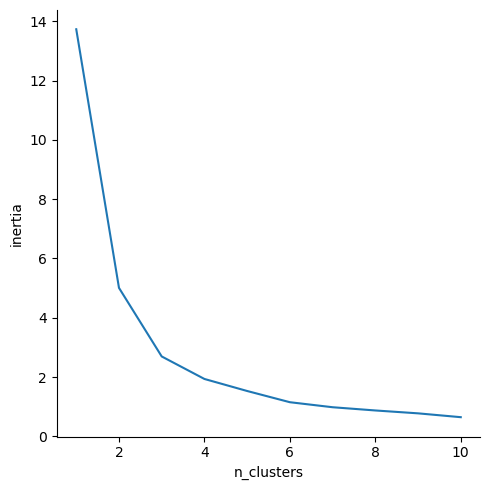

In [20]:
sns.relplot(data=results_df, x='n_clusters', y='inertia', kind='line')
plt.show()

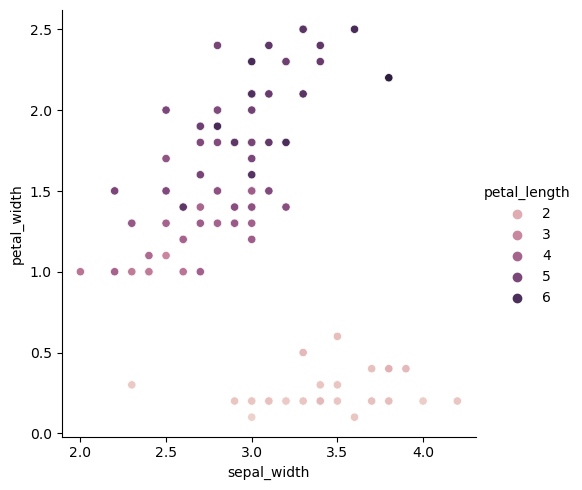

In [21]:
sns.relplot(data=train, x ='sepal_width', y='petal_width', hue='petal_length')
plt.show()

In [22]:
X2 = train[['sepal_width', 'petal_width', 'petal_length']]

In [23]:
seed=42

kmeans = KMeans(n_clusters=3, random_state=seed)

kmeans.fit(X2)

kmeans.predict(X2)

array([1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1,
       2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 0,
       2, 1, 2, 2, 2, 2, 1, 0, 0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1,
       2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0,
       2, 0, 2, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 1, 0, 1, 2], dtype=int32)

In [24]:
X2['unscaled_clusters'] = kmeans.predict(X2)
X2.head()

,sepal_width,petal_width,petal_length,unscaled_clusters
81,2.4,1.0,3.7,1
133,2.8,1.5,5.1,2
137,3.1,1.8,5.5,2
75,3.0,1.4,4.4,1
109,3.6,2.5,6.1,2


In [25]:
mm_scaler = MinMaxScaler()

X2[['sepal_width', 'petal_width', 'petal_length']] = mm_scaler.fit_transform(X2[['sepal_width', 'petal_width', 'petal_length']])

X2.head()

,sepal_width,petal_width,petal_length,unscaled_clusters
81,0.181818,0.375000,0.464286,1
133,0.363636,0.583333,0.714286,2
137,0.500000,0.708333,0.785714,2
75,0.454545,0.541667,0.589286,1
109,0.727273,1.000000,0.892857,2


In [26]:
kmeans_scale = KMeans(n_clusters=3, random_state=seed)

kmeans_scale.fit(X2[['sepal_width', 'petal_width', 'petal_length']])

KMeans(n_clusters=3, random_state=42)

In [27]:
X2['scaled_clusters'] = kmeans_scale.predict(X2[['sepal_width', 'petal_width', 'petal_length']])

X2.head()

,sepal_width,petal_width,petal_length,unscaled_clusters,scaled_clusters
81,0.181818,0.375000,0.464286,1,2
133,0.363636,0.583333,0.714286,2,2
137,0.500000,0.708333,0.785714,2,1
75,0.454545,0.541667,0.589286,1,2
109,0.727273,1.000000,0.892857,2,1


In [28]:
kmeans_scale.cluster_centers_

array([[0.62609971, 0.06182796, 0.06509217],
       [0.47532468, 0.81071429, 0.79744898],
       [0.31118881, 0.50106838, 0.56456044]])

In [29]:
kmeans_scale.inertia_

3.4473435902572147

In [30]:
inertia = []
seed = 42

for n in range(1,11):
    
    kmeans = KMeans(n_clusters=n, random_state=seed)
    
    kmeans.fit(X2[['sepal_width', 'petal_width', 'petal_length']])
    
    inertia.append(kmeans.inertia_)
    
inertia

[23.55729447491971,
 6.71335037608079,
 3.4473435902572147,
 2.7273467113959895,
 2.181315976610272,
 1.7373796807502215,
 1.5121806390887955,
 1.3112642336982752,
 1.164624776141348,
 1.0698010242425005]

In [31]:
results_df = pd.DataFrame({'n_clusters': list(range(1,11)),
              'inertia': inertia})
results_df

,n_clusters,inertia
0,1,23.557294
1,2,6.713350
2,3,3.447344
3,4,2.727347
4,5,2.181316
5,6,1.737380
6,7,1.512181
7,8,1.311264
8,9,1.164625
9,10,1.069801


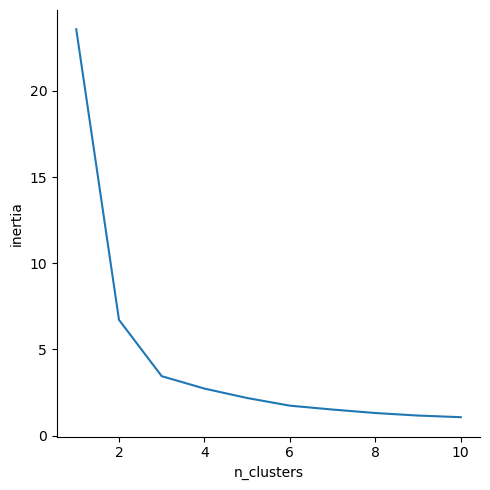

In [32]:
sns.relplot(data=results_df, x='n_clusters', y='inertia', kind='line')
plt.show()

Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [33]:
sql_url = env.get_connection('mall_customers')

In [34]:
query = '''
        SELECT *
        FROM customers
        '''

In [35]:
mall = pd.read_sql(query, sql_url)
mall.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [36]:
seed = 42

train, val_test = train_test_split(mall, train_size=0.7, random_state=seed )

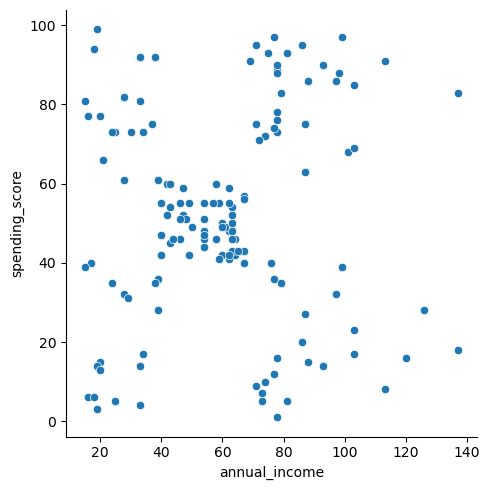

In [37]:
sns.relplot(data=train, x ='annual_income', y='spending_score')
plt.show()

In [38]:
X1 = train[['annual_income', 'spending_score']]

In [39]:
seed=42

kmeans = KMeans(n_clusters=3, random_state=seed)

kmeans.fit(X1)

kmeans.predict(X1)

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 2, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 2, 0,
       1, 2, 1, 1, 1, 2, 2, 1, 2, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 2, 1, 1,
       2, 0, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 0, 2, 2, 0, 1, 1, 1, 1, 1,
       1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 2, 0, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 2, 1, 1, 1, 1, 0, 1], dtype=int32)

In [40]:
X1['unscaled_clusters'] = kmeans.predict(X1)
X1.head()

,annual_income,spending_score,unscaled_clusters
169,87,63,0
97,60,50,1
31,30,73,1
12,20,15,1
35,33,81,1


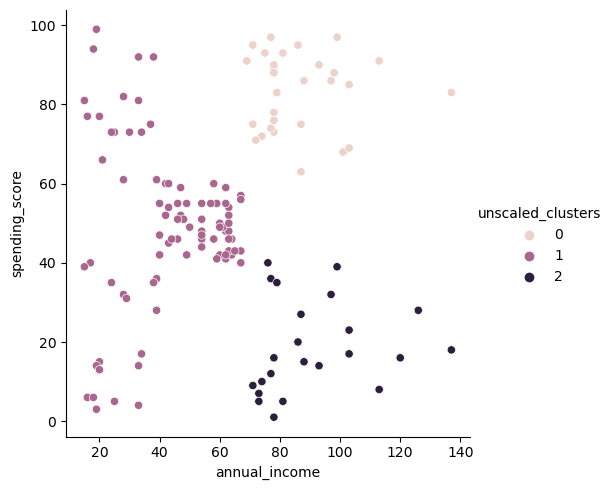

In [41]:
sns.relplot(data=X1, x='annual_income', y='spending_score', hue='unscaled_clusters')
plt.show()

In [42]:
mm_scaler = MinMaxScaler()

X1[['annual_income', 'spending_score']] = mm_scaler.fit_transform(X1[['annual_income', 'spending_score']])

X1.head()

,annual_income,spending_score,unscaled_clusters
169,0.590164,0.632653,0
97,0.368852,0.500000,1
31,0.122951,0.734694,1
12,0.040984,0.142857,1
35,0.147541,0.816327,1


In [43]:
kmeans_scale = KMeans(n_clusters=3, random_state=seed)

kmeans_scale.fit(X1[['annual_income', 'spending_score']])

KMeans(n_clusters=3, random_state=42)

In [44]:
kmeans_scale.predict(X1[['annual_income', 'spending_score']])

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 2, 1, 1, 0, 1, 0, 0, 2, 0, 1, 1, 1, 1, 1, 2, 0,
       1, 2, 1, 1, 1, 2, 2, 1, 2, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 2, 1, 1,
       2, 0, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 0, 2, 2, 0, 1, 1, 1, 0, 1,
       1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 2, 0, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 2, 1, 1, 1, 1, 0, 1], dtype=int32)

In [45]:
X1['scaled_clusters'] = kmeans_scale.predict(X1[['annual_income', 'spending_score']])

X1.head()

,annual_income,spending_score,unscaled_clusters,scaled_clusters
169,0.590164,0.632653,0,0
97,0.368852,0.500000,1,1
31,0.122951,0.734694,1,1
12,0.040984,0.142857,1,1
35,0.147541,0.816327,1,1


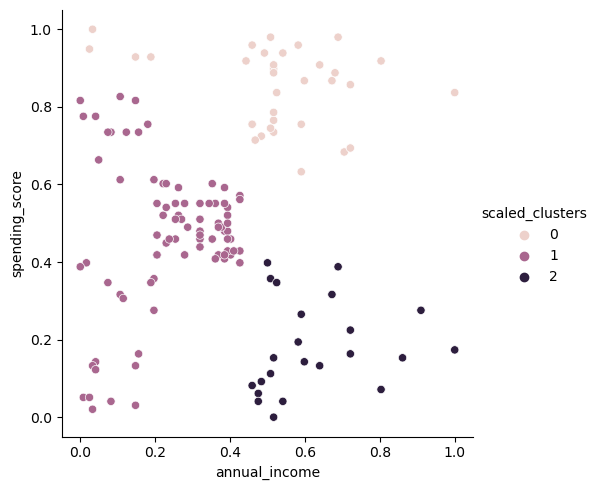

In [46]:
sns.relplot(data=X1, x ='annual_income', y='spending_score', hue='scaled_clusters')
plt.show()

In [47]:
kmeans_scale.cluster_centers_

array([[0.52434908, 0.84993998],
       [0.2390875 , 0.46828129],
       [0.6215253 , 0.18189885]])

In [48]:
kmeans_scale.inertia_

6.7285121645829085

In [49]:
inertia = []
seed = 42

for n in range(1,11):
    
    kmeans = KMeans(n_clusters=n, random_state=seed)
    
    kmeans.fit(X1[['annual_income', 'spending_score']])
    
    inertia.append(kmeans.inertia_)
    
inertia

[16.963147133772708,
 10.269545631428599,
 6.7285121645829085,
 4.460477413564867,
 2.638507912257571,
 2.2465609773383513,
 1.919590365531958,
 1.6122504303816063,
 1.338346525360671,
 1.183104531831045]

In [50]:
results_df1 = pd.DataFrame({'n_clusters': list(range(1,11)),
              'inertia': inertia})
results_df1

,n_clusters,inertia
0,1,16.963147
1,2,10.269546
2,3,6.728512
3,4,4.460477
4,5,2.638508
5,6,2.246561
6,7,1.919590
7,8,1.612250
8,9,1.338347
9,10,1.183105


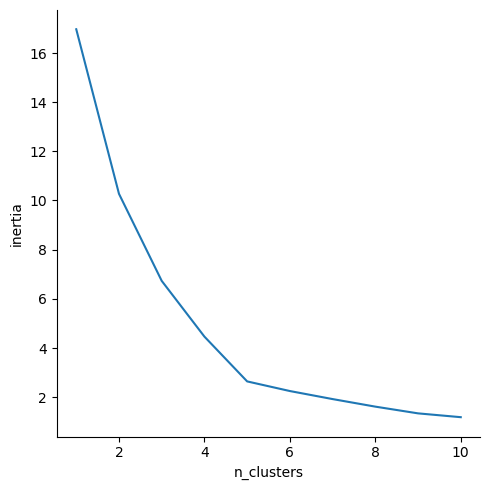

In [51]:
sns.relplot(data=results_df1, x='n_clusters', y='inertia', kind='line')
plt.show()

How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.



In [52]:
X3 = train[['annual_income', 'spending_score']]

In [53]:
seed=42

kmeans = KMeans(n_clusters=3, random_state=seed)

kmeans.fit(X3)

kmeans.predict(X3)

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 2, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 2, 0,
       1, 2, 1, 1, 1, 2, 2, 1, 2, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 2, 1, 1,
       2, 0, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 0, 2, 2, 0, 1, 1, 1, 1, 1,
       1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 2, 0, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 2, 1, 1, 1, 1, 0, 1], dtype=int32)

In [54]:
X3['unscaled_clusters'] = kmeans.predict(X3)
X3.head()

,annual_income,spending_score,unscaled_clusters
169,87,63,0
97,60,50,1
31,30,73,1
12,20,15,1
35,33,81,1


In [55]:
inertia = []
seed = 42

for n in range(1,11):
    
    kmeans = KMeans(n_clusters=n, random_state=seed)
    
    kmeans.fit(X3[['annual_income', 'spending_score']])
    
    inertia.append(kmeans.inertia_)
    
inertia

[199576.99285714285,
 130301.41021671827,
 78804.34432783608,
 53624.59178743961,
 32731.686051693407,
 27033.898714031067,
 22381.057444189795,
 18162.51712387854,
 16314.335620915035,
 14765.028250915751]

In [56]:
results_df1 = pd.DataFrame({'n_clusters': list(range(1,11)),
              'inertia': inertia})
results_df1

,n_clusters,inertia
0,1,199576.992857
1,2,130301.410217
2,3,78804.344328
3,4,53624.591787
4,5,32731.686052
5,6,27033.898714
6,7,22381.057444
7,8,18162.517124
8,9,16314.335621
9,10,14765.028251


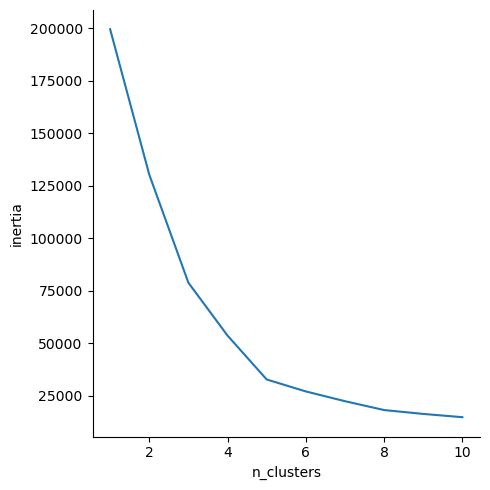

In [57]:
sns.relplot(data=results_df1, x='n_clusters', y='inertia', kind='line')
plt.show()